In [8]:
from google.colab import drive

In [9]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:

df_train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSE 366 mini_project/Train.csv')
df_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSE 366 mini_project/Test.csv')

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [12]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
print(df_train.isnull().sum())
print("\n")
print(df_test.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


**Finding the percentage of NaN values in each feature**

In [14]:
features_with_na=[features for features in df_train.columns if df_train[features].isnull().sum()>1]
for feature in features_with_na:
  print(feature, np.round(df_train[feature].isnull().mean(),2),'% missing values')
print("\n")
features_with_na=[features for features in df_test.columns if df_test[features].isnull().sum()>1]
for feature in features_with_na:
  print(feature, np.round(df_test[feature].isnull().mean(),2),'% missing values')

Item_Weight 0.17 % missing values
Outlet_Size 0.28 % missing values


Item_Weight 0.17 % missing values
Outlet_Size 0.28 % missing values


**Filling Null Values**

In [15]:
df_train["Item_Weight"].fillna(df_train["Item_Weight"].mean(), inplace=True)
df_train["Outlet_Size"].fillna(df_train["Outlet_Size"].mode()[0], inplace=True)

df_test["Item_Weight"].fillna(df_train["Item_Weight"].mean(), inplace=True)
df_test["Outlet_Size"].fillna(df_test["Outlet_Size"].mode()[0], inplace=True)

**Replace 0 with mean values in Item_visibility**

In [16]:

df_train.loc[:, 'Item_Visibility'].replace([0],[df_train['Item_Visibility'].mean()],inplace=True)

df_test.loc[:,'Item_Visibility'].replace([0],[df_test['Item_Visibility'].mean()],inplace=True)

**Dropping irrelevent Columns**

In [17]:
df_train.drop(['Item_Identifier'],axis=1,inplace=True)
df_train.drop(['Outlet_Identifier'],axis=1,inplace=True)
df_train.drop(['Outlet_Establishment_Year'],axis=1,inplace=True) 

df_test.drop(['Item_Identifier'],axis=1,inplace=True)
df_test.drop(['Outlet_Identifier'],axis=1,inplace=True)
df_test.drop(['Outlet_Establishment_Year'],axis=1,inplace=True) 

In [18]:
#train_set
cat_col=[]
for x in df_train.dtypes.index:
  if df_train.dtypes[x]=='object':
    cat_col.append(x)

for col in cat_col:
  print(col)
  print(df_train[col].value_counts())
  print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [19]:
#test_set
cat_col=[]
for x in df_test.dtypes.index:
  if df_test.dtypes[x]=='object':
    cat_col.append(x)

for col in cat_col:
  print(col)
  print(df_test[col].value_counts())
  print()

Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

Item_Type
Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

Outlet_Size
Medium    3468
Small     1592
High       621
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64



In [20]:

df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
df_train['Item_Fat_Content'].value_counts()

df_test['Item_Fat_Content']=df_test['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
df_test['Item_Fat_Content'].value_counts()


Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

**Visualization**

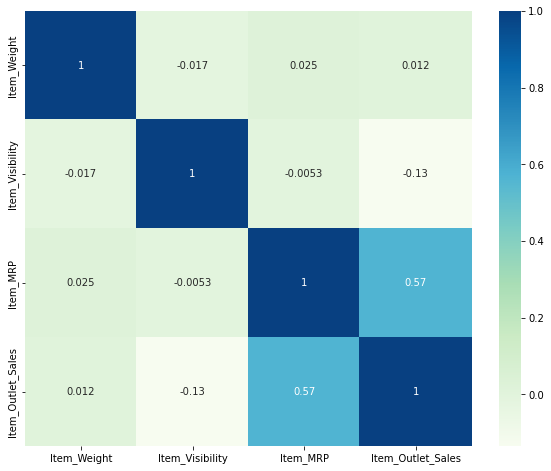

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(),cmap='GnBu', annot=True)
plt.show()

**Visualization on Numerical features**

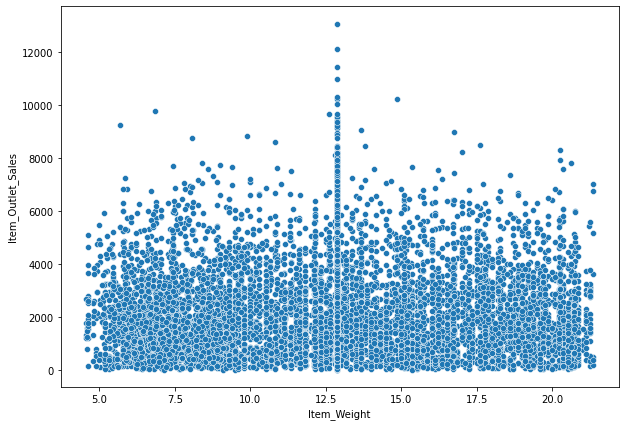

In [22]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',data=df_train)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


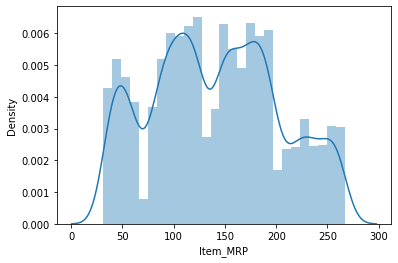

In [23]:
#sns.displot(x=df_train.Item_MRP,kde=True)
sns.distplot(df_train['Item_MRP'])
plt.show()

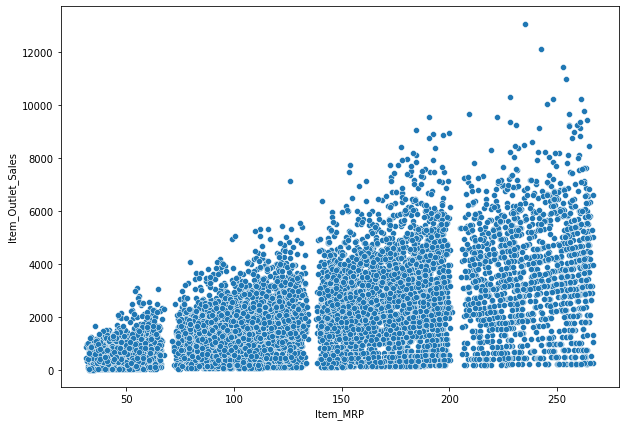

In [24]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=df_train)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


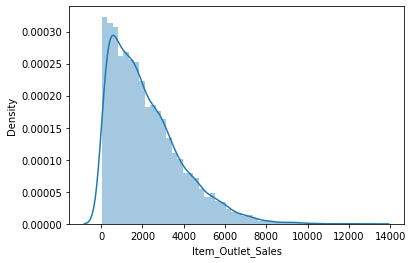

In [25]:
sns.distplot(df_train['Item_Outlet_Sales'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


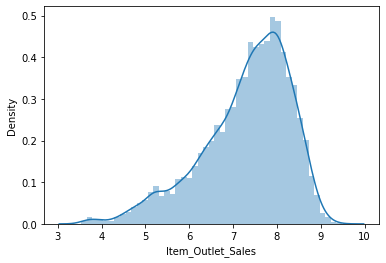

In [26]:
df_train['Item_Outlet_Sales']=np.log(1+df_train['Item_Outlet_Sales'])
sns.distplot(df_train['Item_Outlet_Sales'])

***As the plot before shows that Item_Outlet_Sells doesn't follow the normal distribution, So to have normal distribution,we use log function.It makes the data to follow normal distribution or near the normal distribution***

**Visualization on Categorical features**

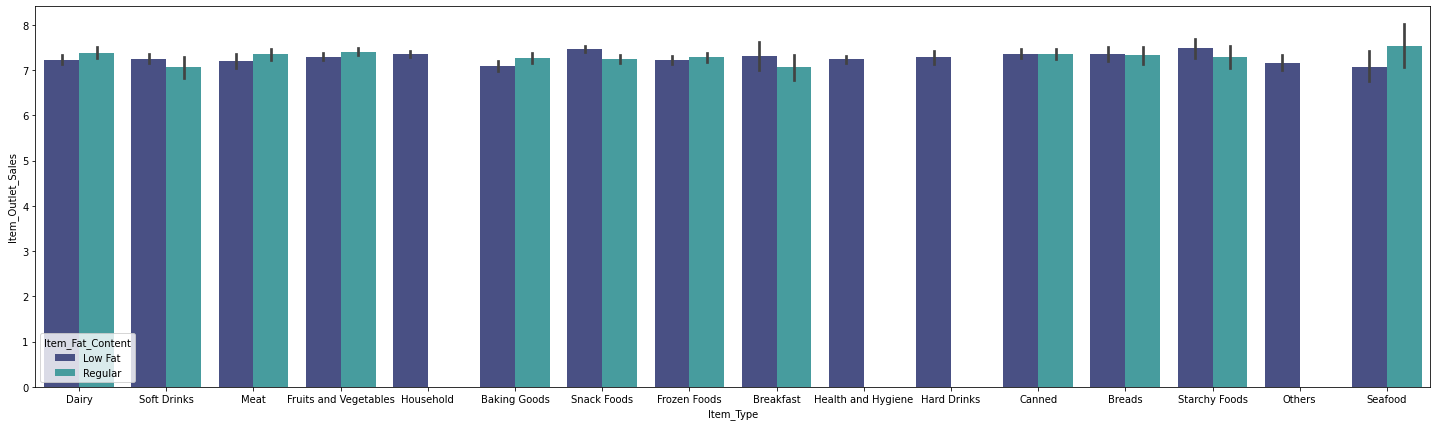

In [27]:
plt.figure(figsize=(25,7))
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',hue='Item_Fat_Content',data=df_train, palette='mako')
plt.show()

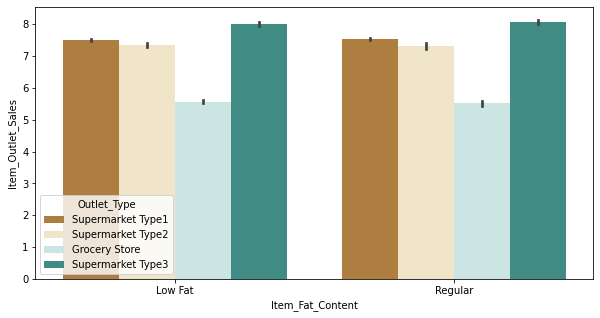

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales',data=df_train,hue='Outlet_Type',palette='BrBG')
plt.show()

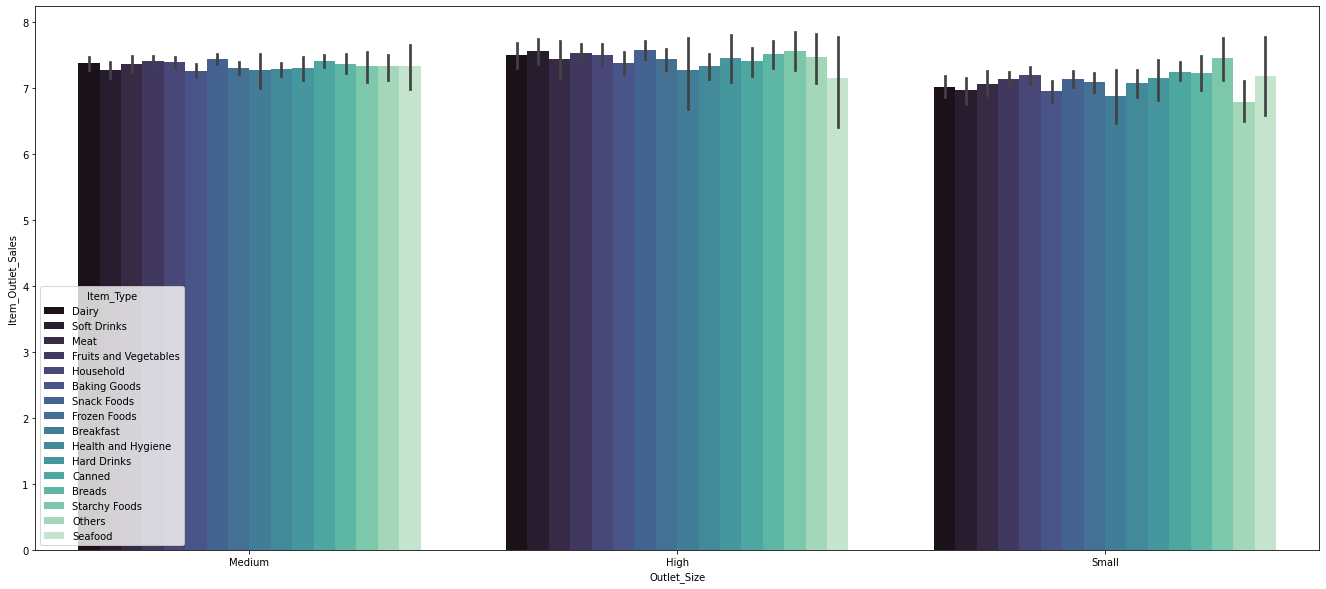

In [29]:
plt.figure(figsize=(23,10))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',hue='Item_Type',data=df_train, palette='mako')
plt.show()

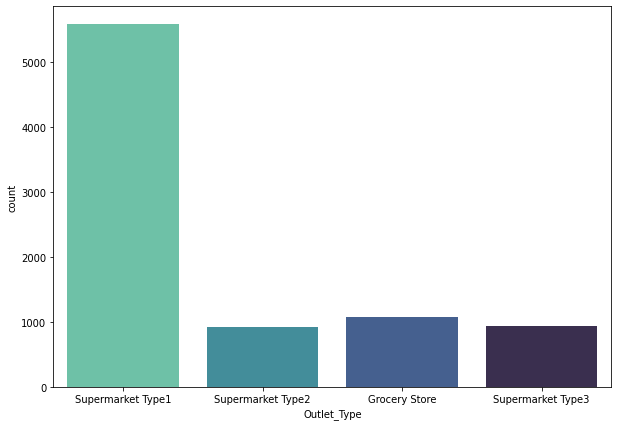

In [30]:
plt.figure(figsize=(10,7))
sns.countplot(x='Outlet_Type',data=df_train,palette='mako_r')
plt.show()

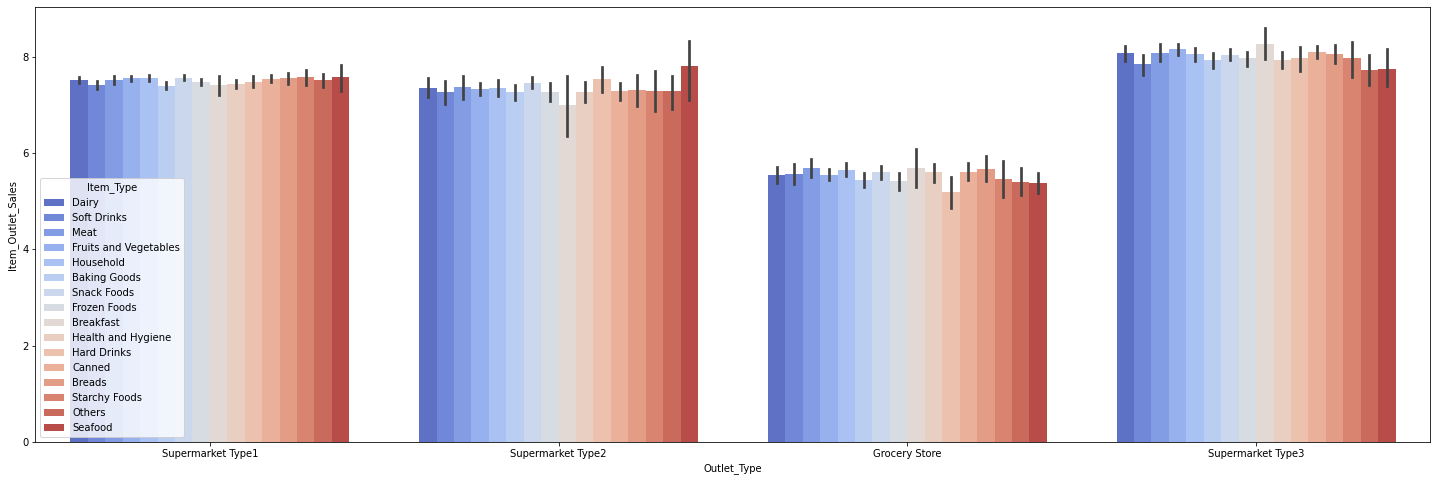

In [31]:
plt.figure(figsize=(25,8))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',hue='Item_Type',data=df_train, palette='coolwarm')
plt.show()

**One Hot Encoding**

In [32]:
df_train=pd.get_dummies(df_train,columns=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'])
df_test=pd.get_dummies(df_test,columns=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'])


**Train Test Spliting**

In [33]:
X = df_train.drop(columns=["Item_Outlet_Sales"])    
Y = df_train.Item_Outlet_Sales 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

**Scaling**

In [34]:
sc=StandardScaler()

In [35]:
X_train_std=sc.fit_transform(X_train)

In [36]:
X_test_std=sc.transform(X_test)

**Linear Regression**

In [37]:
from sklearn.linear_model import LinearRegression
lc=LinearRegression()
lc.fit(X_train_std,Y_train)

LinearRegression()

In [38]:
pred1=lc.predict(X_test_std)

**Random Forest Regressor**

In [39]:
from sklearn.ensemble import RandomForestRegressor
Rclf=RandomForestRegressor()
Rclf.fit(X_train,Y_train)

RandomForestRegressor()

In [40]:
pred2=Rclf.predict(X_test)
pred2

array([8.32038647, 7.63165884, 7.45996154, ..., 6.15595982, 5.14119589,
       7.980774  ])

**Gradient Boosting Regressor**

In [41]:
from sklearn.ensemble import GradientBoostingRegressor
gr= GradientBoostingRegressor()
gr.fit(X_train,Y_train)

pred4=gr.predict(X_test)

In [42]:
from sklearn.svm import SVR
vec=SVR(gamma='auto')
vec.fit(X_train,Y_train)
pred5=vec.score(X_test,Y_test)
pred5

0.6126777274889086

In [43]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("Result on Linear Regression:\n")
print("R2_Score:\t\t",r2_score(Y_test,pred1))
print("Mean_absolute_error:\t",mean_absolute_error(Y_test,pred1))
print("Mean_squared_error\t",mean_squared_error(Y_test,pred1))
print("\n")
print("Result on Random Forest Regression:\n")
print("R2_Score:\t\t",r2_score(Y_test,pred2))
print("Mean_absolute_error:\t",mean_absolute_error(Y_test,pred2))
print("Mean_squared_error\t",mean_squared_error(Y_test,pred2))
print("\n")
print("Result on Gradient Boost Regression:\n")
print("R2_Score:\t\t",r2_score(Y_test,pred4))
print("Mean_absolute_error:\t",mean_absolute_error(Y_test,pred4))
print("Mean_squared_error\t",mean_squared_error(Y_test,pred4))


Result on Linear Regression:

R2_Score:		 0.715299634058234
Mean_absolute_error:	 0.41670556161788375
Mean_squared_error	 0.2933707441498407


Result on Random Forest Regression:

R2_Score:		 0.6958562222913354
Mean_absolute_error:	 0.4351941424967537
Mean_squared_error	 0.31340629331395237


Result on Gradient Boost Regression:

R2_Score:		 0.7272301688609453
Mean_absolute_error:	 0.4088445314575746
Mean_squared_error	 0.281076872093867
